In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as graph
import seaborn as sns

from rosey.helpers import vec_to_array

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
import keras.losses as klosses
import keras.optimizers as kopt
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# %env KERAS_BACKEND=theano
# %env THEANO_FLAGS=device=cuda3,floatX=float32,optimizer=fast_run

graph.style.use('fivethirtyeight')

def plot_number(xi, yi=''):
    graph.figure(figsize=(1, 1))
    graph.title('{}'.format(yi))
    graph.imshow(xi.reshape(28, 28), cmap='Greys')
    graph.xticks([])
    graph.yticks([])
    graph.grid(False)
    graph.show()

/home/stephen/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load data
df = pd.read_csv('data/digit-recognizer/train.csv')

y = df.pop('label')
x = df.values
x = MinMaxScaler().fit_transform(x)
print(y.shape, x.shape)

y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.25)
_ = [print(a.shape) for a in (y_train, y_test, x_train, x_test)]

/home/stephen/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(42000,) (42000, 784)
(31500,)
(10500,)
(31500, 784)
(10500, 784)


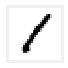

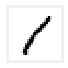

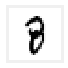

In [3]:
plot_number(x[0, :])
plot_number(x[39370, :])
plot_number(x[17521, :])

# Simple Autoencoder

In [4]:
# Simple Autoencoder
input_layer = Input(shape=(x.shape[1],))

encoder_layer = Dense(100)(input_layer)  # Bottleneck

decoder_layer = Dense(100, activation='elu')(encoder_layer)
output_layer = Dense(x.shape[1], activation='sigmoid')(decoder_layer)

# Create models
autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, encoder_layer)

display(autoencoder.summary())

# Compile
autoencoder.compile(
    loss=klosses.binary_crossentropy,
    optimizer=kopt.RMSprop(),
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
Total params: 167,784
Trainable params: 167,784
Non-trainable params: 0
_________________________________________________________________


None

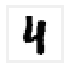

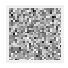

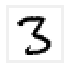

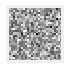

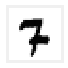

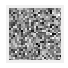

In [5]:
# Before Fitting!
for i in range(3):
    number = vec_to_array(x_train[i, :]).T

    plot_number(number)
    plot_number(autoencoder.predict(number))

Train on 26775 samples, validate on 4725 samples
Epoch 1/1000
26775/26775 [==============================] - 1s 44us/step - loss: 0.5424 - val_loss: 0.3288
Epoch 2/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2982 - val_loss: 0.2757
Epoch 3/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2684 - val_loss: 0.2618
Epoch 4/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2554 - val_loss: 0.2498
Epoch 5/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2439 - val_loss: 0.2389
Epoch 6/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2330 - val_loss: 0.2291
Epoch 7/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2242 - val_loss: 0.2208
Epoch 8/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2154 - val_loss: 0.2115
Epoch 9/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.2069 - val_l

26775/26775 [==============================] - 1s 40us/step - loss: 0.1075 - val_loss: 0.1082
Epoch 77/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.1075 - val_loss: 0.1084
Epoch 78/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.1072 - val_loss: 0.1080
Epoch 79/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.1068 - val_loss: 0.1073
Epoch 80/1000
26775/26775 [==============================] - 1s 37us/step - loss: 0.1064 - val_loss: 0.1073
Epoch 81/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.1059 - val_loss: 0.1074
Epoch 82/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.1058 - val_loss: 0.1072
Epoch 83/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.1055 - val_loss: 0.1064
Epoch 84/1000
26775/26775 [==============================] - 1s 42us/step - loss: 0.1051 - val_loss: 0.1056
Epoch 85/1000
26775/26775 [===============

26775/26775 [==============================] - 1s 38us/step - loss: 0.0921 - val_loss: 0.0936
Epoch 152/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0921 - val_loss: 0.0933
Epoch 153/1000
26775/26775 [==============================] - 1s 37us/step - loss: 0.0922 - val_loss: 0.0935
Epoch 154/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0918 - val_loss: 0.0929
Epoch 155/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0918 - val_loss: 0.0932
Epoch 156/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0917 - val_loss: 0.0926
Epoch 157/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0914 - val_loss: 0.0927
Epoch 158/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0913 - val_loss: 0.0923
Epoch 159/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0916 - val_loss: 0.0932
Epoch 160/1000
26775/26775 [======

Epoch 225/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0843 - val_loss: 0.0855
Epoch 226/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0842 - val_loss: 0.0855
Epoch 227/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0842 - val_loss: 0.0854
Epoch 228/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0841 - val_loss: 0.0853
Epoch 229/1000
26775/26775 [==============================] - 1s 43us/step - loss: 0.0841 - val_loss: 0.0853
Epoch 230/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0841 - val_loss: 0.0853
Epoch 231/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.0840 - val_loss: 0.0852
Epoch 232/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.0840 - val_loss: 0.0852
Epoch 233/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0839 - val_loss: 0.0852
Epoch 234/1000
2677

26775/26775 [==============================] - 1s 39us/step - loss: 0.0819 - val_loss: 0.0832
Epoch 301/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0819 - val_loss: 0.0831
Epoch 302/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0818 - val_loss: 0.0831
Epoch 303/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0818 - val_loss: 0.0831
Epoch 304/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.0818 - val_loss: 0.0831
Epoch 305/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0818 - val_loss: 0.0830
Epoch 306/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0818 - val_loss: 0.0830
Epoch 307/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0817 - val_loss: 0.0830
Epoch 308/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0817 - val_loss: 0.0830
Epoch 309/1000
26775/26775 [======

Epoch 371/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 372/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 373/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819

Epoch 00373: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 374/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 375/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 376/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 377/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 378/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819

Epoch 00378: ReduceLROnPlateau reducing learn

Epoch 445/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 446/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 447/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 448/1000
26775/26775 [==============================] - 1s 37us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 449/1000
26775/26775 [==============================] - 1s 37us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 450/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 451/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 452/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 453/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 454/1000
2677

26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 521/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 522/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 523/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 524/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 525/1000
26775/26775 [==============================] - 1s 37us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 526/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 527/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 528/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0819
Epoch 529/1000
26775/26775 [======

26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 596/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 597/1000
26775/26775 [==============================] - 1s 45us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 598/1000
26775/26775 [==============================] - 1s 43us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 599/1000
26775/26775 [==============================] - 1s 43us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 600/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 601/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 602/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 603/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 604/1000
26775/26775 [======

26775/26775 [==============================] - 2s 57us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 671/1000
26775/26775 [==============================] - 2s 62us/step - loss: 0.0806 - val_loss: 0.0818
Epoch 672/1000
26775/26775 [==============================] - 2s 72us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 673/1000
26775/26775 [==============================] - 2s 78us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 674/1000
26775/26775 [==============================] - 2s 62us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 675/1000
26775/26775 [==============================] - 1s 56us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 676/1000
26775/26775 [==============================] - 2s 56us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 677/1000
26775/26775 [==============================] - 2s 57us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 678/1000
26775/26775 [==============================] - 2s 59us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 679/1000
26775/26775 [======

26775/26775 [==============================] - 2s 61us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 746/1000
26775/26775 [==============================] - 2s 59us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 747/1000
26775/26775 [==============================] - 2s 59us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 748/1000
26775/26775 [==============================] - 2s 70us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 749/1000
26775/26775 [==============================] - 2s 80us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 750/1000
26775/26775 [==============================] - 3s 102us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 751/1000
26775/26775 [==============================] - 2s 77us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 752/1000
26775/26775 [==============================] - 2s 73us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 753/1000
26775/26775 [==============================] - 2s 65us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 754/1000
26775/26775 [=====

26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 821/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 822/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 823/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 824/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 825/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 826/1000
26775/26775 [==============================] - 1s 43us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 827/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 828/1000
26775/26775 [==============================] - 1s 40us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 829/1000
26775/26775 [======

26775/26775 [==============================] - 1s 39us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 896/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 897/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 898/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 899/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 900/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 901/1000
26775/26775 [==============================] - 1s 41us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 902/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 903/1000
26775/26775 [==============================] - 1s 39us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 904/1000
26775/26775 [======

26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 971/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 972/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 973/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 974/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 975/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 976/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 977/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 978/1000
26775/26775 [==============================] - 1s 38us/step - loss: 0.0805 - val_loss: 0.0818
Epoch 979/1000
26775/26775 [======

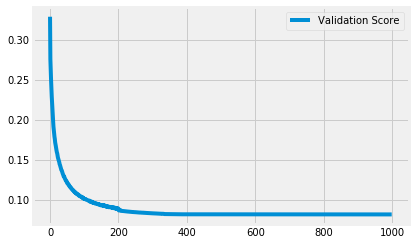

CPU times: user 1h 9min 30s, sys: 13min 48s, total: 1h 23min 19s
Wall time: 18min 54s


In [6]:
%%time
# Fit model!
hist = autoencoder.fit(
    x_train, x_train,
    epochs=1000, validation_split=0.15, batch_size=4096,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15),
        ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6, verbose=1),
        ModelCheckpoint('data/model.ckp', monitor='val_loss', save_best_only=True)
    ],
    shuffle=True,
    verbose=1
)

graph.plot(hist.history['val_loss'], label='Validation Score')
graph.legend()
graph.show()

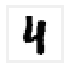

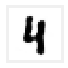

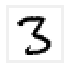

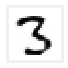

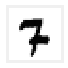

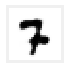

In [7]:
# After Fitting!
for i in range(3):
    number = vec_to_array(x_train[i, :]).T

    plot_number(number)
    plot_number(autoencoder.predict(number))

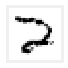

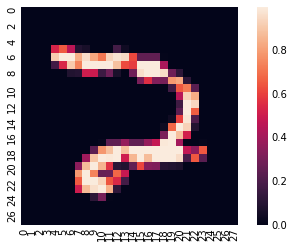

Representation


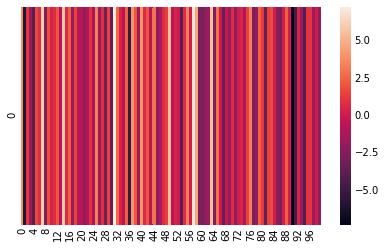

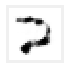

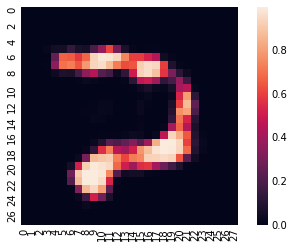

In [8]:
new_number = vec_to_array(x_test[1013, :]).T

plot_number(new_number)

sns.heatmap(new_number.reshape((28, 28)), square=True)
graph.show()

print('Representation')
sns.heatmap(encoder.predict(new_number))
graph.show()

print('')
plot_number(autoencoder.predict(new_number))

sns.heatmap(autoencoder.predict(new_number).reshape((28, 28)), square=True)
graph.show()

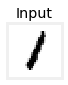

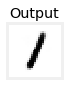

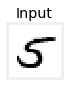

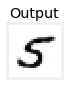

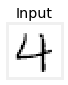

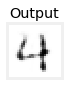

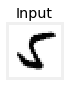

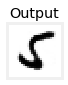

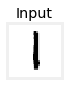

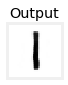

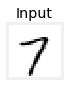

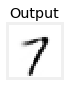

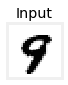

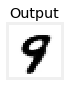

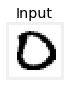

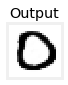

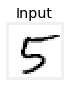

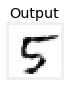

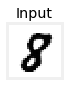

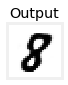

In [10]:
# Test set fits!
for i in range(10):
    number = vec_to_array(x_test[i, :]).T

    plot_number(number, 'Input')
    plot_number(autoencoder.predict(number), 'Output')